In [2]:
%matplotlib inline  
import numpy as np 
import pandas as pd 
import pylab as pl 
import datetime as dt 
import os 
from wmf import wmf 
from multiprocessing import Pool
import matplotlib
import MySQLdb
import json
from cpr import cpr
import pickle
import alarmas as al
import funciones_sora
#Ignorar avisos pendejos
import warnings
warnings.filterwarnings('ignore')
import funciones_sora as fs
import glob

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
# rutaconfig='/media/nicolas/Home/Jupyter/Soraya/git/Alarmas/04_web_hidrologia/hidrologia/configfile_web.md'
listconfig=al.get_rutesList(rutaconfig)
dfconfig=pd.read_json(al.get_ruta(listconfig,'ruta_JSONinfosirenas'))
dfconfig

,EstMeteoAdentro,EstMeteoAfuera,EstN30m,EstNivel,EstNivel1,EstPluvioAdentro,EstPluvioAfuera,EstTto,Nombres Alarmas,Nombres Corriente Asociada,URL Cuencas
216,[197],[249],[108],"[90, 108]",[108],"[3, 18, 43]",,,SIRENA SANTA RITA SAN ANTONIO DE PRADO,Q. DONA MARIA,NaN
219,,[249],,"[173, 116]",[173],[29],"[1, 8]",,SIRENA BELEN - LAS VIOLETAS,Q. LA PICACHA,NaN
220,,[249],,"[173, 116]",[116],[29],"[1, 8, 9]",,SIRENA AGUAS FRIAS,Q. PICACHA,NaN
221,,[105],,[259],[259],,"[33, 253]",,SIRENA ANDALUCIA CALDAS,Q. LA CORRALA,NaN
222,,[82],,"[251, 186]",[186],,"[234, 30]",,SIRENA BARBOSA,Q. LA GALLINAZA,NaN
223,,,,"[265, 135]",[135],,"[12, 14, 48, 89]",,SIRENA BELLO CAFETAL,Q. LA LOCA,NaN
224,[105],,"[179, 106]","[179, 106, 124]",[106],"[267, 61, 261, 33, 253]",,[179],SIRENA LA ESTRELLA,RIO MEDELLIN - LA INMACULADA,NaN
226,,[105],,[246],[246],[261],[61],,SIRENA LA RAYA,Q. LA RAYA,NaN
279,,[70],,[239],[239],[248],[70],,SIRENA PIEDRAS BLANCAS,PIEDRAS BLANCAS,NaN
280,,,,"[283, 134]",[134],"[281, 121]","[89, 14, 48]",,SIRENA LA ISLA,LA MADERA Y MONTANITA,NaN


In [ ]:
#estaciones para las que no se hizo análisis de eventos.
est_outfig=[246,272,239,173,186,251,259,283,155]

Risk levels

In [3]:
self=cpr.Nivel(90)
infoestaciones = self.infost
risklevels_all=infoestaciones[['action_level','minor_flooding','moderate_flooding','major_flooding']]

In [7]:
np.sort(paths)

array(['historicos/nivel/106_H.csv', 'historicos/nivel/108_H.csv',
       'historicos/nivel/116_H.csv', 'historicos/nivel/124_H.csv',
       'historicos/nivel/134_H.csv', 'historicos/nivel/135_H.csv',
       'historicos/nivel/155_H.csv', 'historicos/nivel/173_H.csv',
       'historicos/nivel/179_H.csv', 'historicos/nivel/186_H.csv',
       'historicos/nivel/239_H.csv', 'historicos/nivel/246_H.csv',
       'historicos/nivel/251_H.csv', 'historicos/nivel/259_H.csv',
       'historicos/nivel/265_H.csv', 'historicos/nivel/272_H.csv',
       'historicos/nivel/283_H.csv', 'historicos/nivel/90_H.csv',
       'historicos/nivel/Nmax_108.csv', 'historicos/nivel/bandas_108.csv',
       'historicos/nivel/eventos_108.csv'],
      dtype='|S32')

ValueError: invalid literal for int() with base 10: 'x_1'

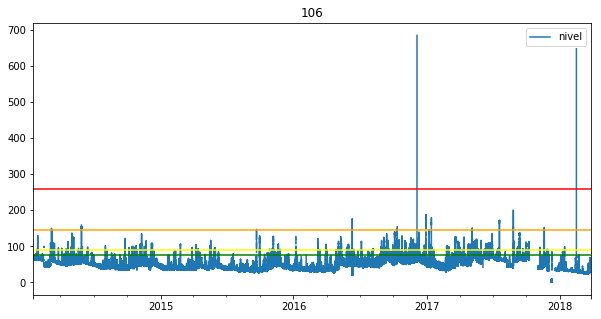

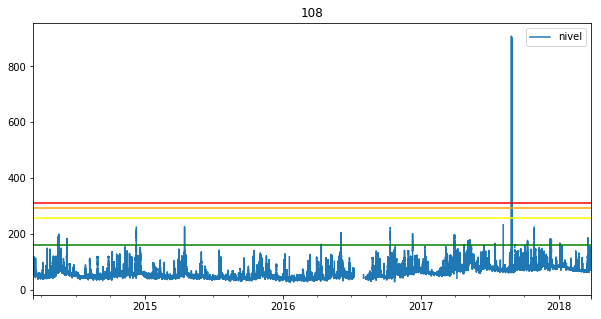

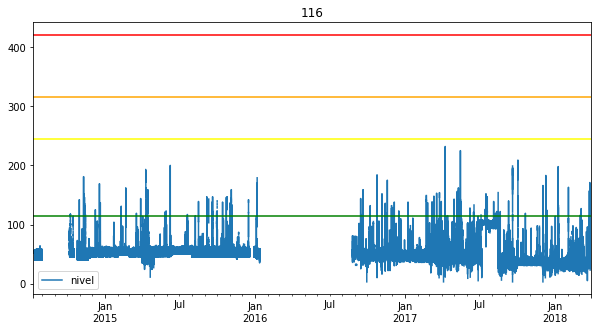

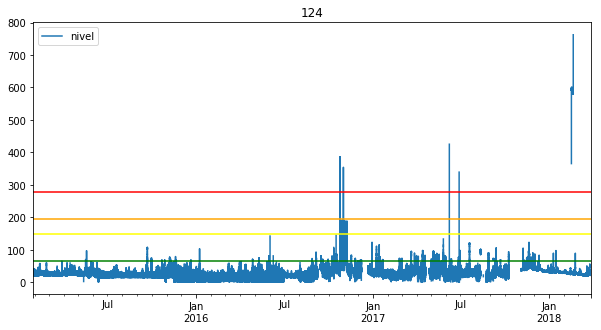

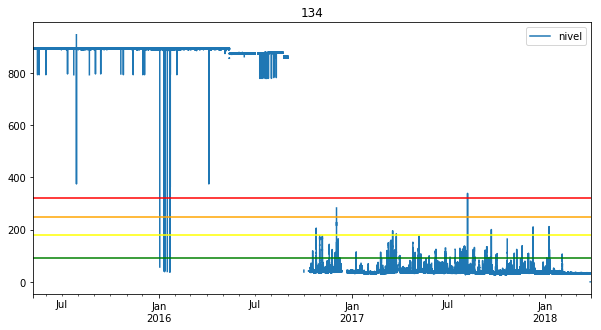

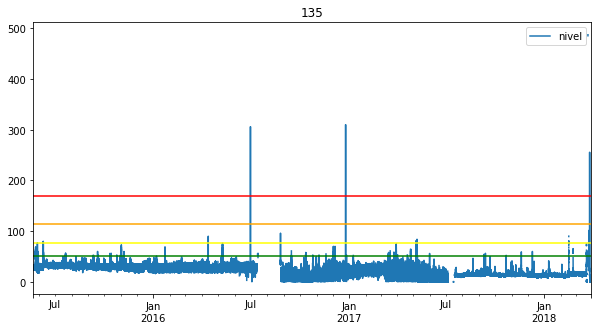

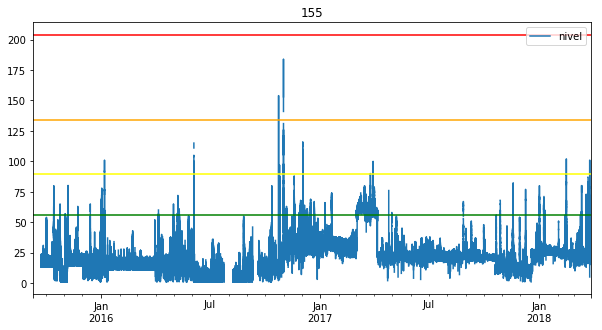

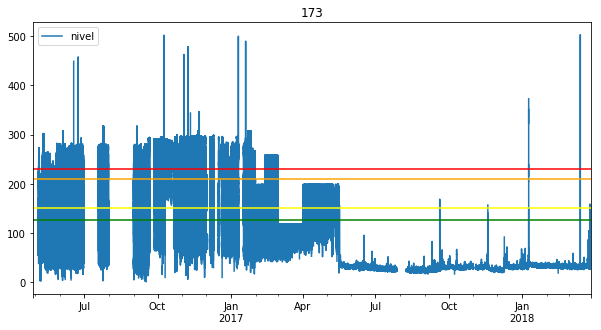

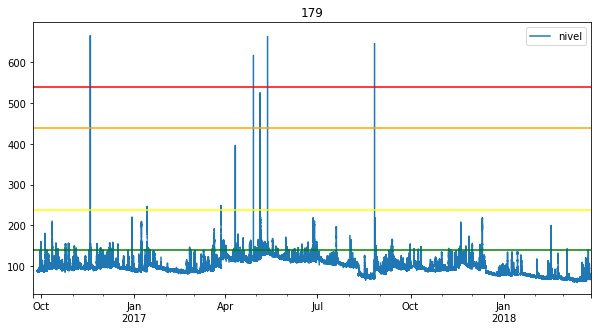

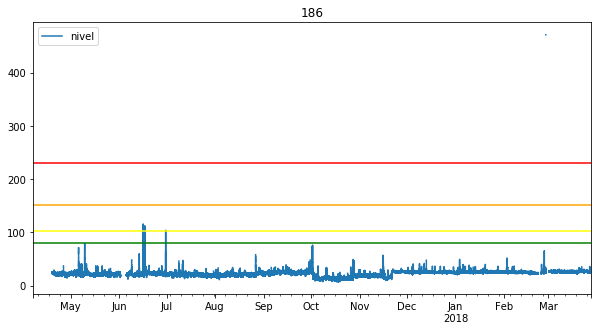

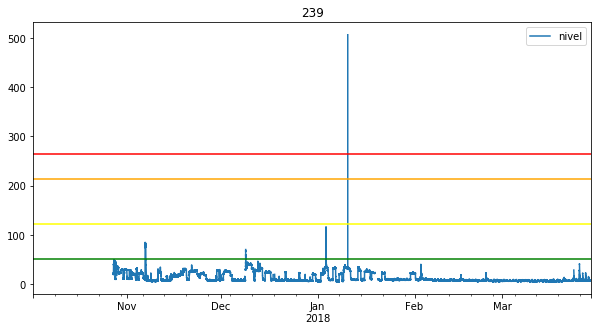

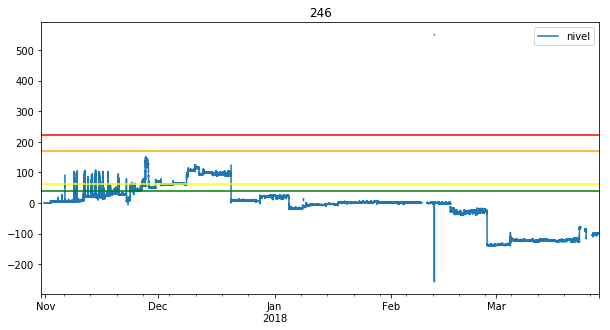

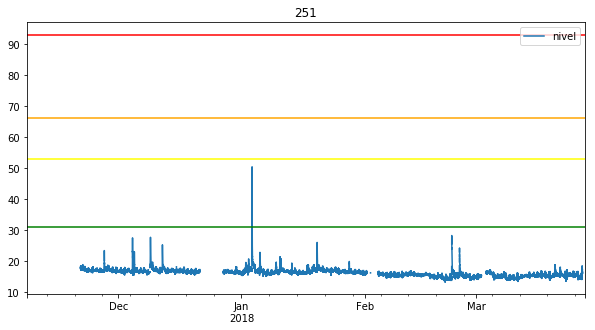

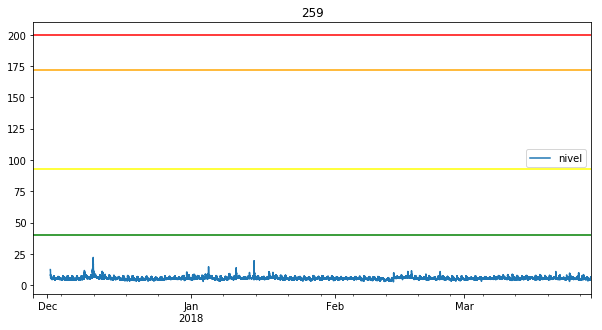

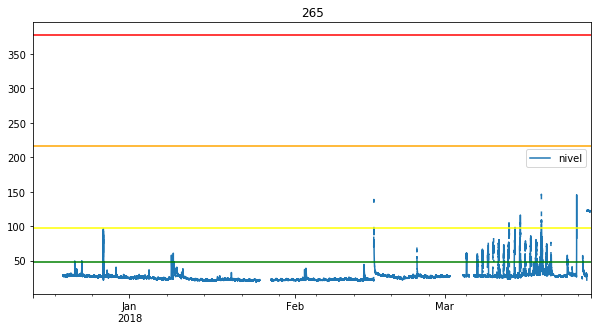

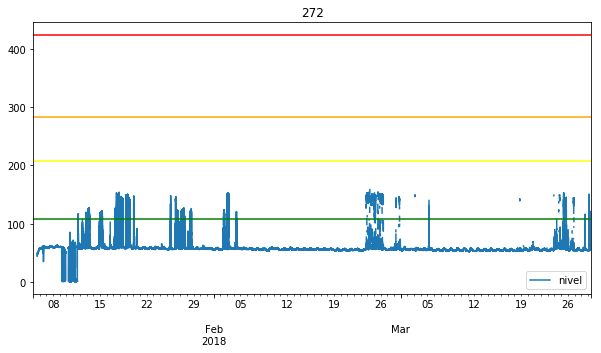

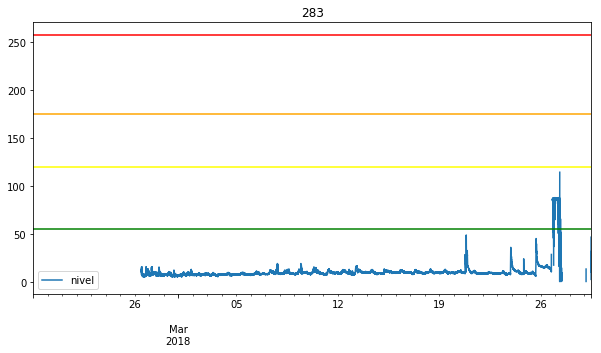

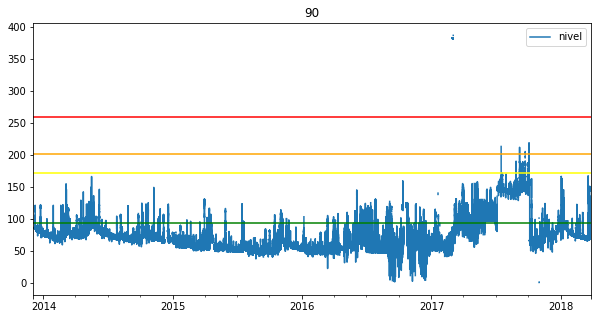

In [4]:
paths=glob.glob('historicos/nivel/*.csv')
for path in np.sort(paths):
    est=int(path[-9:-6].split('/')[-1])
    #leer y organizar las series.
    nivel=pd.read_csv(path)
    nivel.index=pd.to_datetime(nivel[nivel.keys()[0]])#nivel[nivel.keys()[0]]
    nivel.index.name=''
    nivel=nivel.drop(nivel.keys()[0],axis=1)
    nivel.columns=['nivel']
    nrisk=np.array(risklevels_all[risklevels_all.index==est])[0]
    if est==246:
        pass
    else:
        #FILTRO CALIDAD
        nivel[nivel<=0]=np.nan
    nivel[nivel>nrisk[-1]*]=np.nan
    pl.figure()
    nivel.plot(figsize=(10,5))
    colors=['g','yellow','orange','r']
    for index,i in enumerate(nrisk):
        pl.axhline(i,c=colors[index])
    pl.title(str(est))

Fechas de interés

In [41]:
evC={'216':['2016-12-10'],
    '222':['2016-12-08'],
    '223':['2018-03-26'],
    '224':['2017-01-14'],
    '280':['2018-03-26']
    }
evD={'216':['2016-12-10'],
    '219':['2016-05-15'],
    '226':['2017-04-05']
    }
# fechascrecientes=['2016-12-10','2016-12-08','2018-03-26','2017-01-14','2018-03-26']
# fechasdeslizamientos=['2016-12-10','2016-05-15','2017-04-05']

ruta histoóricos P

In [28]:
paths_p={}
for path in glob.glob('/media/nicolas/Home/Jupyter/Soraya/git/Alarmas/04_web_hidrologia/hidrologia/historicos/pluvio/*'):
    paths_p.update({path[-9:-6].split('/')[-1]:path})


Se busca al fecha exacta de los eventos para estP.

In [238]:
def SearchEvFeatures(evC,paths_p,dfconfig,timeperiod='24 hours'):
    evC1={};Pacum10dC={};Pacum3dC={};Pacum1dC={};Pacum3hC={};Pmax3hC={}
    for sir in evC.keys():
        ev=evC[sir][0]
        #se identifican las estacionesP asociadas a la alarma.
        ests_p=np.append(np.hstack(dfconfig[dfconfig.index==sir]['EstPluvioAdentro']),np.hstack(dfconfig[dfconfig.index==sir]['EstPluvioAfuera']))
        ests_p=ests_p[np.where(ests_p)[0]]
        evc1={}
        for est_p in ests_p:
    #     est_p=ests_p[2]
            #             for date in evC[sir]:
            date=dt.datetime.strptime(ev,'%Y-%m-%d')
            #se lee y organiza la seriep.
            seriep=pd.read_csv(paths_p[str(est_p)])
            seriep.index=pd.to_datetime(seriep[seriep.keys()[0]])
            seriep.index.name=''
            seriep=seriep.drop(seriep.keys()[0],axis=1)
            seriep.columns=['pluvio']
            seriep=seriep['pluvio']

            #Se busca la fecha exacta del evento en cada est_p, se asocia al pico maximo en 48 hr alrededor del dia del evento.
            # si el evento esta en la seriep
            if date in seriep.index:
                seriev=seriep[date:date+pd.Timedelta(timeperiod)]  
    #             #plot
    #             pl.figure()
    #             pl.title(str(est_p)+' '+str(date)+' '+str(seriev.dropna().size/float(seriev.size)))
    #             seriev.plot()
                # si mas del 40%de datos no son nan
                if seriev.dropna().size/float(seriev.size) > 0.1:
                    #se guarda la fecha
                    evc1.update({str(est_p):str(seriev.argmax())})          
                    Pacum10dC.update({str(est_p):seriep[seriev.argmax()-pd.Timedelta('10 days'):seriev.argmax()].sum()})
                    Pacum3dC.update({str(est_p):seriep[seriev.argmax()-pd.Timedelta('3 days'):seriev.argmax()].sum()})
                    Pacum1dC.update({str(est_p):seriep[seriev.argmax()-pd.Timedelta('1 days'):seriev.argmax()].sum()})
                    Pacum3hC.update({str(est_p):seriep[seriev.argmax()-pd.Timedelta('3 hours'):seriev.argmax()].sum()})
                    Pmax3hC.update({str(est_p):seriev.max()})
                elif seriev.max()==0.0:
                    evc1.update({str(est_p):np.nan})
                    Pacum10dC.update({str(est_p):np.nan})
                    Pacum3dC.update({str(est_p):np.nan})
                    Pacum1dC.update({str(est_p):np.nan})
                    Pacum3hC.update({str(est_p):np.nan})
                    Pmax3hC.update({str(est_p):np.nan})
                else:
                    evc1.update({str(est_p):np.nan})
                    Pacum10dC.update({str(est_p):np.nan})
                    Pacum3dC.update({str(est_p):np.nan})
                    Pacum1dC.update({str(est_p):np.nan})
                    Pacum3hC.update({str(est_p):np.nan})
                    Pmax3hC.update({str(est_p):np.nan})
            else:
                evc1.update({str(est_p):np.nan})
                Pacum10dC.update({str(est_p):np.nan})
                Pacum3dC.update({str(est_p):np.nan})
                Pacum1dC.update({str(est_p):np.nan})
                Pacum3hC.update({str(est_p):np.nan})
                Pmax3hC.update({str(est_p):np.nan})
    #             pl.figure()
        evC1.update({sir:evc1})
    return evC1,Pacum10dC,Pacum3dC,Pacum1dC,Pacum3hC,Pmax3hC

#### Crecientes

In [239]:
evC1,Pacum10dC,Pacum3dC,Pacum1dC,Pacum3hC,Pmax3hC=SearchEvFeatures(evC,paths_p,dfconfig)

In [240]:
evC1

{'216': {'18': '2016-12-10 02:39:00', '3': nan, '43': nan},
 '222': {'234': nan, '30': '2016-12-08 13:54:00'},
 '223': {'12': '2018-03-26 17:11:00',
  '14': '2018-03-26 17:24:00',
  '48': '2018-03-26 17:20:00',
  '89': '2018-03-26 17:40:00'},
 '224': {'253': nan,
  '261': nan,
  '267': nan,
  '33': '2017-01-14 18:28:00',
  '61': nan},
 '280': {'121': '2018-03-26 17:29:00',
  '14': '2018-03-26 17:24:00',
  '281': '2018-03-26 17:24:00',
  '48': '2018-03-26 17:20:00',
  '89': '2018-03-26 17:40:00'}}

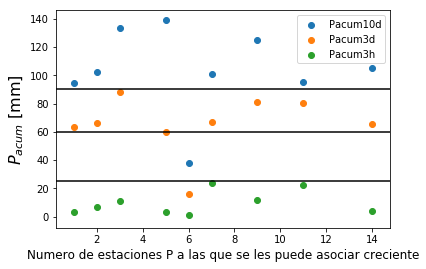

In [260]:
pl.scatter(np.arange(0,len(Pacum10dC.values())),Pacum10dC.values(),label='Pacum10d')
pl.axhline(90,c='k')
pl.scatter(np.arange(0,len(Pacum3dC.values())),Pacum3dC.values(),label='Pacum3d')
pl.axhline(60,c='k')
# pl.scatter(np.arange(0,len(Pacum1dC.values())),Pacum1dC.values())
pl.scatter(np.arange(0,len(Pacum3hC.values())),Pacum3hC.values(),label='Pacum3h')
pl.axhline(25,c='k')
pl.xlabel('Numero de estaciones P a las que se les puede asociar creciente',fontsize=12)
pl.ylabel('$P_{acum}$ [mm]',fontsize=16)
pl.legend()

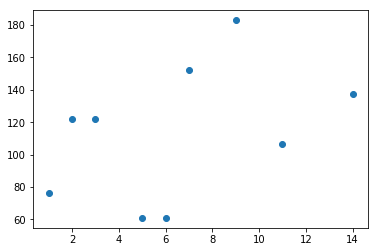

In [218]:
pl.scatter(np.arange(0,len(Pmax3hC.values())),np.array(Pmax3hC.values())*60)

In [247]:
#Se guarda info.
Pfeatures={}
Pfeatures.update({'eventosC':evC1})
Pfeatures.update({'pacum10d':Pacum10dC})
Pfeatures.update({'pacum3d':Pacum3dC})
Pfeatures.update({'pacum1d':Pacum1dC})
Pfeatures.update({'pacum3h':Pacum3hC})
Pfeatures.update({'pmax3h':Pmax3hC})

import json
with open('historicos/eventosH/Pfeatures_evCrecientes.json', 'w') as f:
    json.dump(Pfeatures, f)

#### Deslizamientos

In [221]:
evD1,Pacum10dD,Pacum3dD,Pacum1dD,Pacum3hD,Pmax3hD=SearchEvFeatures(evD,paths_p,dfconfig)

In [222]:
evD1

{'216': {'18': Timestamp('2016-12-10 02:39:00'), '3': nan, '43': nan},
 '219': {'1': Timestamp('2016-05-15 00:00:00'),
  '29': Timestamp('2016-05-15 00:00:00'),
  '8': nan},
 '226': {'261': nan, '61': Timestamp('2017-04-05 00:00:00')}}

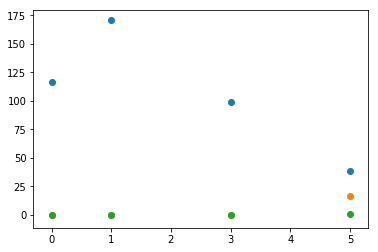

In [233]:
pl.scatter(np.arange(0,len(Pacum10dD.values())),Pacum10dD.values())
# pl.axhline(90,c='k')
pl.scatter(np.arange(0,len(Pacum3dD.values())),Pacum3dD.values())
# pl.axhline(60,c='k')
# pl.scatter(np.arange(0,len(Pacum1dD.values())),Pacum1dD.values())
pl.scatter(np.arange(0,len(Pacum3hD.values())),Pacum3hD.values())
# pl.axhline(25,c='k')

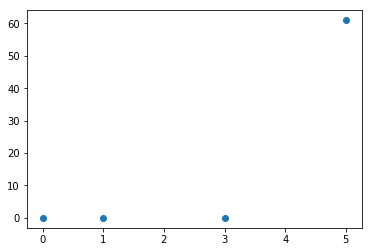

In [235]:
pl.scatter(np.arange(0,len(Pmax3hD.values())),np.array(Pmax3hD.values())*60)